# Resolution du probleme du boulanger

In [1]:
using Distributions, Random
using LinearAlgebra 

using JuMP, Gurobi, GLPK 

using  Plots

### Generation

In [2]:
m = [50 , 30] # mean  
Σ = [25  0.4 ; 0.4  4] # Covariate matrix

dist = MvNormal(m, Σ)

FullNormal(
dim: 2
μ: [50.0, 30.0]
Σ: [25.0 0.4; 0.4 4.0]
)


##### Illustration of the distribution realizations

In [ ]:
# Fixing seed for reproductibility
Random.seed!(12345)

In [ ]:
nEchantillon = 100  
pScenario = 1/nEchantillon

realizations = rand(dist, nEchantillon)

In [ ]:
NMonteCarlo = 100000
realizationsMC = rand(dist, NMonteCarlo)

scatter(realizationsMC[1,:], realizationsMC[2,:], xlims=(-1, 80), ylims=(-1, 40), legend=false)

We can see that $\mathbb{P}(\xi \leq 0) \approx 0$ !!! So we can easily consider that $\Xi \subset \mathbb{R}_+^2$.

### Problem resolution with 100 scenarios

In [42]:
coutsFixes = [1.5 , 1.8]
vente = [-3 , - 4]
invendus = [-1 , - 1.2]

flourNeed = [0.15, 0.20]
flourCapacity = 12

12

In [43]:
exemple = Model(with_optimizer(GLPK.Optimizer))

# first stage variables
@variable(exemple,x[1:2] >= 0)

# second stage variables
@variable(exemple , yWI[1:nEchantillon] >= 0)
@variable(exemple , yWE[1:nEchantillon] >= 0)
@variable(exemple , wWI[1:nEchantillon] >=0)
@variable(exemple , wWE[1:nEchantillon] >=0)

# constraints
@constraint(exemple , dot(flourNeed, x) <= flourCapacity )

for i=1:nEchantillon
    @constraint(exemple , yWI[i] + wWI[i] <= x[1] )
    @constraint(exemple , yWI[i] <= realizations[1,i])
    @constraint(exemple , yWE[i] + wWE[i] <= x[2])
    @constraint(exemple , yWE[i] <= realizations[2, i])
end

@objective(exemple, Min, sum(coutsFixes[i]*x[i] for i=1:2)
        + pScenario*sum( vente[1]*yWI[i] + vente[2]*yWE[i] + invendus[1]*wWI[i] + invendus[2]*wWE[i] for i = 1:nEchantillon))
;

In [44]:
# To print latex formulation of the problem !!!! Very long

# latex_formulation(exemple)

In [45]:
optimize!(exemple)

In [46]:
println("Benefit: ", objective_value(exemple))

Benefit: -124.4343869331702


In [47]:
println("Production of bread: \n\n", value.(x))

Production of bread: 

[42.91458213516746, 27.81406339862441]


In [48]:
println("White bread sold: \n\n", value.(yWI))

White bread sold: 

[42.91458213516746, 42.91458213516746, 41.12185046692894, 42.91458213516746, 42.91458213516746, 42.91458213516746, 42.91458213516746, 42.91458213516746, 42.91458213516746, 42.91458213516746, 38.872852079150775, 42.91458213516746, 42.91458213516746, 42.91458213516746, 42.91458213516746, 42.91458213516746, 42.91458213516746, 42.91458213516746, 42.91458213516746, 42.91458213516746, 42.91458213516746, 42.91458213516746, 42.91458213516746, 42.91458213516746, 42.91458213516746, 42.91458213516746, 42.91458213516746, 42.91458213516746, 42.91458213516746, 42.91458213516746, 42.91458213516746, 42.91458213516746, 42.91458213516746, 42.91458213516746, 42.91458213516746, 42.91458213516746, 42.91458213516746, 42.91458213516746, 42.91458213516746, 42.91458213516746, 42.91458213516746, 42.91458213516746, 42.91458213516746, 42.91458213516746, 42.91458213516746, 42.91458213516746, 37.034205290851844, 42.91458213516746, 42.91458213516746, 42.91458213516746, 42.91458213516746, 40.57955

In [49]:
println("Rest of White bread: \n\n", value.(wWI))

Rest of White bread: 

[0.0, 0.0, 1.7927316682385177, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.041730056016683, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.880376844315613, 0.0, 0.0, 0.0, 0.0, 2.3350315048613832, 0.4619716916837222, 0.0, 0.0, 0.0, 0.0, 4.34458726630897, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.6067084426279545, 0.0, 0.0, 5.127072573366554, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.8722438234109762, 0.0, 0.0, 3.695623494308073, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [50]:
println("whole wheat bread sold: \n\n", value.(yWE))

whole wheat bread sold: 

[27.81406339862441, 27.81406339862441, 26.5694153772786, 27.81406339862441, 27.81406339862441, 27.81406339862441, 26.206110593721302, 27.81406339862441, 27.81406339862441, 27.81406339862441, 27.81406339862441, 27.81406339862441, 27.81406339862441, 27.81406339862441, 27.81406339862441, 27.783905288358216, 27.81406339862441, 27.81406339862441, 27.81406339862441, 26.83119742469354, 27.81406339862441, 27.81406339862441, 27.81406339862441, 27.39490626455106, 27.81406339862441, 27.81406339862441, 27.81406339862441, 27.81406339862441, 27.81406339862441, 27.81406339862441, 27.81406339862441, 27.81406339862441, 27.81406339862441, 26.80768964811871, 27.81406339862441, 27.24510271318964, 27.81406339862441, 27.81406339862441, 25.298366038116363, 27.81406339862441, 27.81406339862441, 27.81406339862441, 27.81406339862441, 27.81406339862441, 27.81406339862441, 27.81406339862441, 27.81406339862441, 27.81406339862441, 27.81406339862441, 27.81406339862441, 27.81406339862441, 27

In [51]:
println("Rest whole wheat bread: \n\n", value.(wWE))

Rest whole wheat bread: 

[0.0, 0.0, 1.2446480213458115, 0.0, 0.0, 0.0, 1.6079528049031082, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.030158110266194194, 0.0, 0.0, 0.0, 0.9828659739308719, 0.0, 0.0, 0.0, 0.41915713407334965, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0063737505056998, 0.0, 0.5689606854347687, 0.0, 0.0, 2.5156973605080473, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.3238774541484517, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9772468908708483, 0.0, 0.0, 0.0, 0.0, 0.5000765585709424, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3958991904285547, 0.9652779311534658, 0.0, 1.0083677760386287, 0.0, 0.0, 0.0, 1.6404673545092585, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3517656717901261, 0.0, 0.0, 1.077785876219636, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


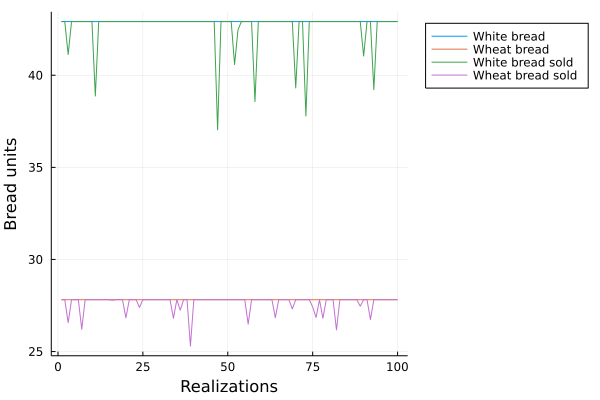

In [52]:
X1 = ones(nEchantillon)*value(x[1])
X2 = ones(nEchantillon)*value(x[2])

p = plot(xlabel="Realizations", ylabel="Bread units", legend=:outertopright)
plot!(collect(1:nEchantillon), X1, label="White bread")
plot!(collect(1:nEchantillon), X2, label="Wheat bread")
plot!(collect(1:nEchantillon), value.(yWI), label="White bread sold")
plot!(collect(1:nEchantillon), value.(yWE), label="Wheat bread sold")

p

## Integer programming

In [53]:
exemple_int = Model(with_optimizer(GLPK.Optimizer))

# First-order variables
@variable(exemple_int,x[1:2] >= 0, Int)

# Second-order variables
@variable(exemple_int , yWI[1:nEchantillon] >= 0, Int)
@variable(exemple_int , yWE[1:nEchantillon] >= 0, Int)
@variable(exemple_int , wWI[1:nEchantillon] >=0, Int)
@variable(exemple_int , wWE[1:nEchantillon] >=0, Int)

# constraints
@constraint(exemple_int , dot(flourNeed, x) <= flourCapacity )

for i=1:nEchantillon
    @constraint(exemple_int , yWI[i] + wWI[i] <= x[1] )
    @constraint(exemple_int , yWI[i] <= Int(round(realizations[1,i])))
    @constraint(exemple_int , yWE[i] + wWE[i] <= x[2])
    @constraint(exemple_int , yWE[i] <= Int(round(realizations[2, i])))
end

@objective(exemple_int, Min, sum(coutsFixes[i]*x[i] for i=1:2)
        + pScenario*sum( vente[1]*yWI[i] + vente[2]*yWE[i] + invendus[1]*wWI[i] + invendus[2]*wWE[i] for i = 1:nEchantillon))
;

In [54]:
optimize!(exemple_int)

In [55]:
println("Benefit: ", objective_value(exemple_int))

Benefit: -124.29999999999967


In [56]:
println("Production of bread ", value.(x))

Production of bread [44.0, 27.0]


In [57]:
println("White bread sold: \n\n", value.(yWI))

White bread sold: 

[44.0, 44.0, 41.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 39.0, 44.0, 43.0, 44.0, 43.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 43.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 43.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 37.0, 44.0, 44.0, 44.0, 44.0, 41.0, 42.0, 44.0, 44.0, 44.0, 44.0, 39.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 39.0, 44.0, 44.0, 38.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 41.0, 44.0, 44.0, 39.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0]


In [58]:
println("Rest of White bread: \n\n", value.(wWI))

Rest of White bread: 

[0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 0.0, 0.0, 0.0, 0.0, 3.0, 2.0, 0.0, 0.0, 0.0, 0.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 0.0, 0.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [59]:
println("Whole wheat bread sold: \n\n", value.(yWE))

Whole wheat bread sold: 

[27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 26.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 25.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 26.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 26.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0]


In [60]:
println("Rest of whole wheat bread: \n\n", value.(wWE))

Rest of whole wheat bread: 

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


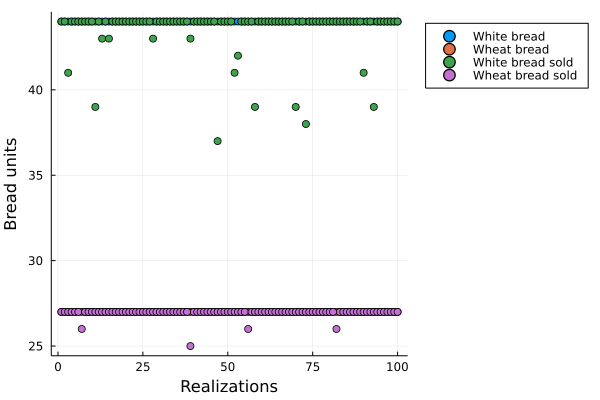

In [63]:
X1 = ones(nEchantillon)*value(x[1])
X2 = ones(nEchantillon)*value(x[2])

p = plot(xlabel="Realizations", ylabel="Bread units", legend=:outertopright)
scatter!(collect(1:nEchantillon), X1, label="White bread")
scatter!(collect(1:nEchantillon), X2, label="Wheat bread")
scatter!(collect(1:nEchantillon), value.(yWI), label="White bread sold")
scatter!(collect(1:nEchantillon), value.(yWE), label="Wheat bread sold")

p

### Studying evolution on several realizations (with integer relaxation)

Method: we generate a sample of size $N$. 

We solve the problem  considering the increasing sample $\tilde{\xi} = (\xi_1, \ldots, \xi_n)$ for $n=1, \ldots, N$.

Then, we plot the evolution of the solution with respect to the increasing sample.

In [45]:
function resolution(realizations::Array)
    m = Model(with_optimizer(GLPK.Optimizer)) 
    
    nEchantillon = size(realizations, 2)
    pScenario = 1/nEchantillon
    
    # First-stage
    @variable(m,x[1:2] >= 0)

    # Second-stage
    @variable(m , yWI[1:nEchantillon] >= 0)
    @variable(m , yWE[1:nEchantillon] >= 0)
    @variable(m , wWI[1:nEchantillon] >=0)
    @variable(m , wWE[1:nEchantillon] >=0)
    
    # constraints
    @constraint(m , dot(flourNeed, x) <= flourCapacity )

    for i=1:nEchantillon
        @constraint(m , yWI[i] + wWI[i] <= x[1] )
        @constraint(m , yWI[i] <= realizations[1,i])
        @constraint(m , yWE[i] + wWE[i] <= x[2])
        @constraint(m , yWE[i] <= realizations[2, i])
    end

    @objective(m, Min, sum(coutsFixes[i]*x[i] for i=1:2)
            + pScenario*sum( vente[1]*yWI[i] + vente[2]*yWE[i] + invendus[1]*wWI[i] + invendus[2]*wWE[i] for i = 1:nEchantillon))

    
    optimize!(m)
    res = value.(x)
    return res
end

resolution (generic function with 1 method)

In [46]:
function MonteCarlo(N::Int64)
    x1 = []
    x2 = []
    realizations = rand(dist, N)
    
    for i = 1:N    
        x = resolution(realizations[:,1:i])
        push!(x1 , x[1])
        push!(x2 , x[2])
        
    end
    
    return x1 , x2
end

MonteCarlo (generic function with 1 method)

In [47]:
N = 1000

x1, x2 = MonteCarlo(N)

abs = 1:1:N
whiteB = plot(abs , x1, label = "White B", ylabel = "Production", legend=:bottomright)
wholeB = plot(abs , x2 , label = "Whole B", ylabel = "Production", legend=:bottomright );

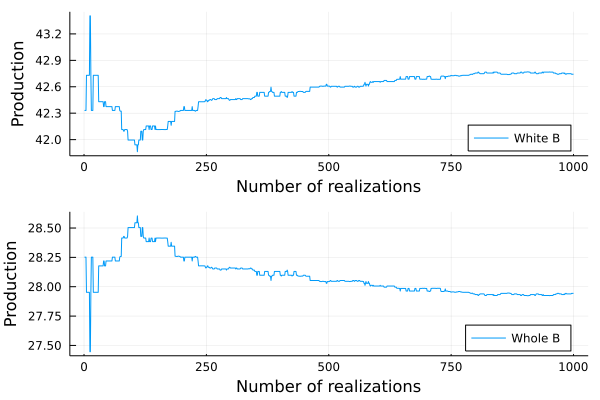

In [48]:
plot(whiteB, wholeB, xlabel="Number of realizations", layout=(2,1))

# Simple recourse version

In [18]:
# Construct model
exemple_simple = Model(with_optimizer(GLPK.Optimizer))

# first stage variables
@variable(exemple_simple,x[1:2] >= 0)

# second stage variables
@variable(exemple_simple , yWI[1:2, 1:nEchantillon] >= 0)
@variable(exemple_simple , yWE[1:2, 1:nEchantillon] >= 0)

# constraints
@constraint(exemple_simple , dot(flourNeed, x) <= flourCapacity )

for j=1:nEchantillon
    @constraint(exemple_simple , yWI[1,j] - yWI[2,j] == x[1] -  realizations[1,j])
    @constraint(exemple_simple , yWE[1,j] - yWE[2,j] == x[2] - realizations[2,j])
end

@objective(exemple_simple, Min, -1.5*x[1] - 2.2x[2]  
        + pScenario*sum( 2*yWI[1,j] + 2.8*yWE[1,j] for j = 1:nEchantillon))
;

In [19]:
optimize!(exemple_simple)

println("[x_1 , x_2] = " , value.(x), "\n")

println("Profit = ", -objective_value(exemple_simple))

[x_1 , x_2] = [42.52943164356398, 28.102926267327017]

Profit = 125.14456780144823
